In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Load the dataframe
#df = pd.read_csv('Evaluation-Final.csv')
#df = pd.read_csv('Performance-Final.csv')

#df = pd.read_csv('Evaluation-Mid.csv')
df = pd.read_csv('Performance-Mid.csv')

data = df

In [3]:
# Reshape the data for 2-factor ANOVA
data_melt = pd.melt(data.reset_index(), id_vars=['index'], value_vars=['F20', 'F21', 'F22', 'F23', 'S21', 'S22', 'S23', 'S24'])
data_melt.columns = ['index', 'Semester_Year', 'Value']

# Create new columns for Semester and Academic Year
data_melt['Semester'] = data_melt['Semester_Year'].apply(lambda x: 'Fall' if 'F' in x else 'Spring')
data_melt['Academic_Year'] = data_melt['Semester_Year'].apply(lambda x: 'AY20-21' if x in ['F20', 'S21'] else ('AY21-22' if x in ['F21', 'S22'] else ('AY22-23' if x in ['F22', 'S23'] else 'AY23-24')))
data_melt.reset_index(drop=True, inplace=True)
data_melt.dropna()

,index,Semester_Year,Value,Semester,Academic_Year
0,0,F20,96.41,Fall,AY20-21
1,1,F20,80.75,Fall,AY20-21
2,2,F20,89.85,Fall,AY20-21
3,3,F20,90.21,Fall,AY20-21
4,4,F20,89.44,Fall,AY20-21
...,...,...,...,...,...
1023,113,S24,63.35,Spring,AY23-24
1024,114,S24,40.53,Spring,AY23-24
1025,115,S24,47.32,Spring,AY23-24
1026,116,S24,61.03,Spring,AY23-24


In [4]:
# Perform the 2-factor ANOVA
model = ols('Value ~ C(Semester) + C(Academic_Year) + C(Semester):C(Academic_Year)', data=data_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Calculate η² (Effect Size)
anova_table['η²'] = anova_table['sum_sq'] / anova_table['sum_sq'].sum()

anova_table_df = pd.DataFrame(anova_table)
anova_table_df

,sum_sq,df,F,PR(>F),η²
C(Semester),11887.419300,1.0,39.557770,4.818873e-10,0.038972
C(Academic_Year),970.639884,3.0,1.076666,3.580358e-01,0.003182
C(Semester):C(Academic_Year),1872.568245,3.0,2.077115,1.016261e-01,0.006139
Residual,290290.556712,966.0,NaN,NaN,0.951706


C:\Users\gani.nurmukhametov\AppData\Local\anaconda3\envs\islp\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\gani.nurmukhametov\AppData\Local\anaconda3\envs\islp\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


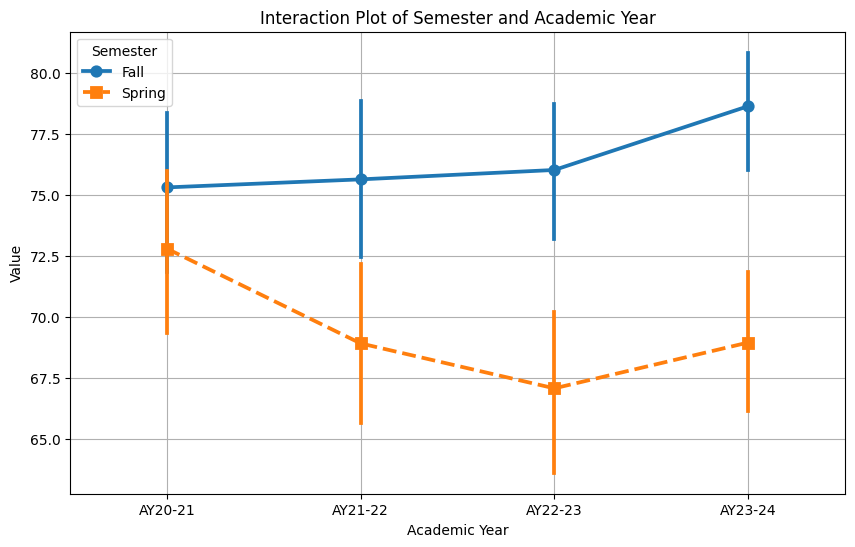

In [5]:
# Create the interaction plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=data_melt, x='Academic_Year', y='Value', hue='Semester', markers=['o', 's'], linestyles=['-', '--'])

plt.title('Interaction Plot of Semester and Academic Year')
plt.xlabel('Academic Year')
plt.ylabel('Value')
plt.legend(title='Semester')
plt.grid(True)
plt.show()